In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Try with known dataset

In [2]:
# Load dataset
data = pd.read_csv("winequality-red.csv")
data.fillna(data.mean(), inplace=True)
#data["type"] = data["type"].astype('category').cat.codes
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
# Take descriptive variables
X = data[["fixed acidity",	"volatile acidity",	"citric acid",
          "residual sugar",	"chlorides",	"free sulfur dioxide",
          "total sulfur dioxide",	"density",	"pH",	"sulphates",	"alcohol"]].to_numpy()

print(X.shape)

(1599, 11)


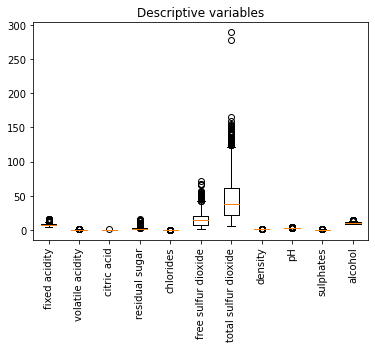

In [5]:
# See distribution of variables
plt.title('Descriptive variables')
plt.boxplot(X)
plt.xticks(ticks=range(1, 12), labels=data.keys()[:-1], rotation=90)
plt.show()

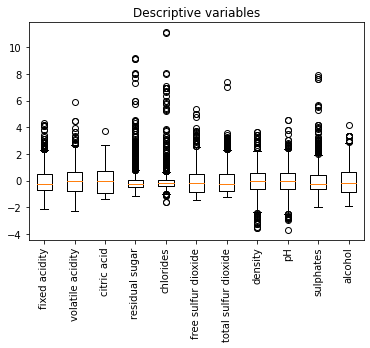

In [6]:
# Scale and plot again
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

plt.title('Descriptive variables')
plt.boxplot(X)
plt.xticks(ticks=range(1, 12), labels=data.keys()[:-1], rotation=90)
plt.show()

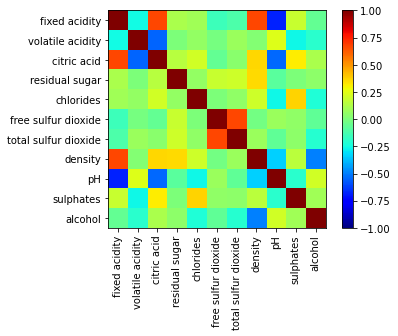

In [7]:
# See correlations
CM = pd.DataFrame(data=X).corr()

plt.imshow(CM, cmap='jet', vmin=-1, vmax=1, aspect='equal')
plt.colorbar()
plt.xticks(ticks=range(11), labels=data.keys()[:-1], rotation=90)
plt.yticks(ticks=range(11), labels=data.keys()[:-1])
plt.show()

In [9]:
# Train a PCA model
pcs = PCA(n_components=len(CM)).fit(X)
pcs

PCA(n_components=11)

In [10]:
# Report PCA summary
pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                           'Proportion of variance': pcs.explained_variance_ratio_,
                           'Cumulative variance': np.cumsum(pcs.explained_variance_ratio_)})

pcsSummary = pcsSummary.transpose()
pcsSummary.columns = ['PC'+str(ind) for ind in range(1, 12)]
pcsSummary.round(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Standard deviation,1.761,1.388,1.246,1.102,0.980,0.812,0.764,0.651,0.587,0.426,0.244
Proportion of variance,0.282,0.175,0.141,0.110,0.087,0.060,0.053,0.038,0.031,0.016,0.005
Cumulative variance,0.282,0.457,0.598,0.708,0.795,0.855,0.908,0.947,0.978,0.995,1.000


In [11]:
# See the weights for each PC
pcsComponents = pd.DataFrame(pcs.components_.transpose(),
                             columns=['PC'+str(ind) for ind in range(1, 12)],
                             index=data.keys()[:-1])

pcsComponents

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
fixed acidity,0.489314,-0.110503,-0.123302,-0.229617,-0.082614,0.101479,-0.350227,-0.177595,-0.194021,-0.249523,0.639691
volatile acidity,-0.238584,0.274930,-0.449963,0.078960,0.218735,0.411449,-0.533735,-0.078775,0.129110,0.365925,0.002389
citric acid,0.463632,-0.151791,0.238247,-0.079418,-0.058573,0.069593,0.105497,-0.377516,0.381450,0.621677,-0.070910
residual sugar,0.146107,0.272080,0.101283,-0.372793,0.732144,0.049156,0.290663,0.299845,-0.007523,0.092872,0.184030
chlorides,0.212247,0.148052,-0.092614,0.666195,0.246501,0.304339,0.370413,-0.357009,-0.111339,-0.217671,0.053065
free sulfur dioxide,-0.036158,0.513567,0.428793,-0.043538,-0.159152,-0.014000,-0.116596,-0.204781,-0.635405,0.248483,-0.051421
total sulfur dioxide,0.023575,0.569487,0.322415,-0.034577,-0.222465,0.136308,-0.093662,0.019036,0.592116,-0.370750,0.068702
density,0.395353,0.233575,-0.338871,-0.174500,0.157077,-0.391152,-0.170481,-0.239223,-0.020719,-0.239990,-0.567332
pH,-0.438520,0.006711,0.057697,-0.003788,0.267530,-0.522116,-0.025138,-0.561391,0.167746,-0.010970,0.340711
sulphates,0.242921,-0.037554,0.279786,0.550872,0.225962,-0.381263,-0.447469,0.374604,0.058367,0.112320,0.069555


In [12]:
# Apply PCA transformation to original data
Z = pd.DataFrame(pcs.transform(X), columns=['PC'+str(ind) for ind in range(1, 12)])
Z

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-1.619530,0.450950,-1.774454,0.043740,0.067014,-0.913921,-0.161043,-0.282258,0.005098,-0.267759,0.048630
1,-0.799170,1.856553,-0.911690,0.548066,-0.018392,0.929714,-1.009829,0.762587,-0.520707,0.062833,-0.138142
2,-0.748479,0.882039,-1.171394,0.411021,-0.043531,0.401473,-0.539553,0.597946,-0.086857,-0.187442,-0.118229
3,2.357673,-0.269976,0.243489,-0.928450,-1.499149,-0.131017,0.344290,-0.455375,0.091577,-0.130393,0.316714
4,-1.619530,0.450950,-1.774454,0.043740,0.067014,-0.913921,-0.161043,-0.282258,0.005098,-0.267759,0.048630
...,...,...,...,...,...,...,...,...,...,...,...
1594,-2.150500,0.814286,0.617063,0.407687,-0.240936,0.054835,0.170812,-0.355866,-0.971524,0.356851,-0.053382
1595,-2.214496,0.893101,1.807402,0.414003,0.119592,-0.674711,-0.607970,-0.247640,-1.058135,0.478879,-0.241258
1596,-1.456129,0.311746,1.124239,0.491877,0.193716,-0.506410,-0.231082,0.079382,-0.808773,0.242248,-0.402910
1597,-2.270518,0.979791,0.627965,0.639770,0.067735,-0.860408,-0.321487,-0.468876,-0.612248,0.779404,0.040923


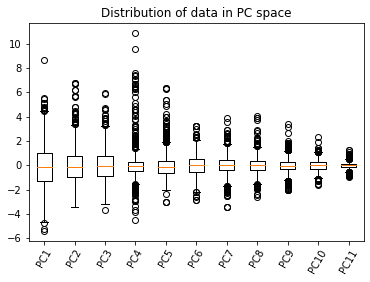

In [13]:
# Plot distribution of data
plt.title('Distribution of data in PC space')
plt.boxplot(pcs.transform(X))
plt.xticks(ticks=range(1, 12), labels=['PC'+str(ind) for ind in range(1, 12)], rotation=60)
plt.show()

In [ ]:
# X_test: nuevos datos. Aplicar la proyección PCA sobre nuevos datos
X_test = np.random.rand(100, 12)
Z_test = pcs.transform(X_test)
Z_test.shape

# Try different dataset

In [2]:
# Load data set
from tensorflow.keras.datasets import mnist
(_, _), (X, Y) = mnist.load_data()

print(X.shape)
print(Y.shape)

(10000, 28, 28)
(10000,)


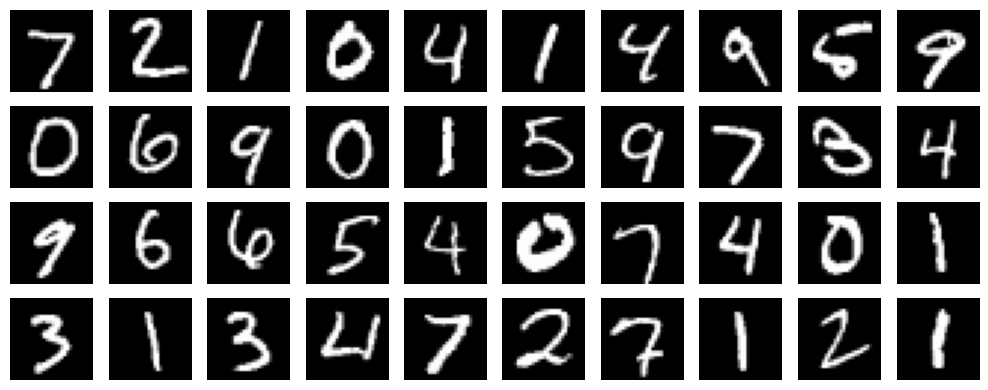

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1]


In [17]:
# Show a few examples
plt.figure(figsize=(10, 4))
for ind in range(40):
    plt.subplot(4, 10, ind+1)
    plt.imshow(X[ind], cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

print(Y[:40])

In [5]:
# Reshape data into vector form
X = X.reshape(-1, 784)

print(X.shape)

(10000, 784)


In [6]:
# Split train and validation sets
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.33)

print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(6700, 784)
(3300, 784)
(6700,)
(3300,)


In [7]:
# Create a PCA object with all components and train it
pca_model = PCA(n_components=784)
pca_model.fit(x_train)

PCA(n_components=784)

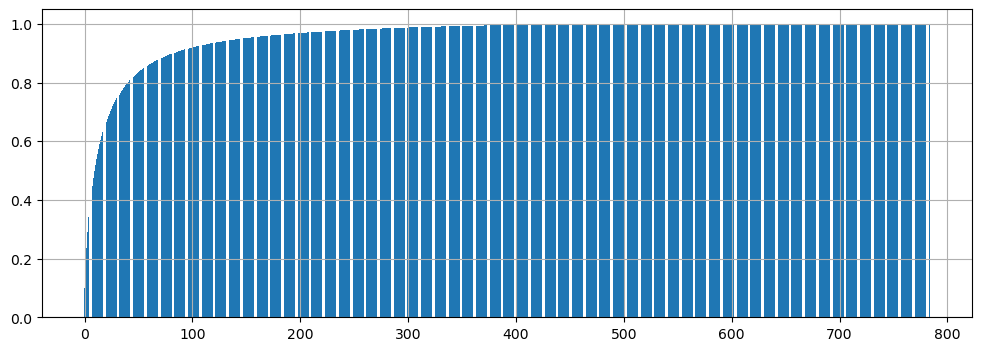

In [9]:
# Plot cumulative variance
var_cumsum = np.cumsum(pca_model.explained_variance_ratio_)
plt.figure(figsize=(12, 4))
plt.bar(range(784), var_cumsum)
plt.grid()
plt.show()

In [10]:
# Explica qué pasa aquí
idx = np.where(var_cumsum >= 0.95)[0][0]
print(f"{idx}: {var_cumsum[idx]:.4f}")

146: 0.9501


In [11]:
# Explica qué pasa aquí
pca_model = PCA(n_components=idx).fit(x_train)
print(pca_model.components_.shape)

(146, 784)


In [12]:
# Explica qué pasa aquí
z_train = pca_model.transform(x_train)
print(z_train.shape)

(6700, 146)


In [13]:
# Explica qué pasa aquí
x_train_hat = pca_model.inverse_transform(z_train)
print(x_train_hat.shape)

(6700, 784)


In [14]:
# Explica qué pasa aquí
reconstruc_error = np.abs(x_train - x_train_hat).mean()
print(f"Recontruction error: {reconstruc_error:.2f}")

Recontruction error: 8.16


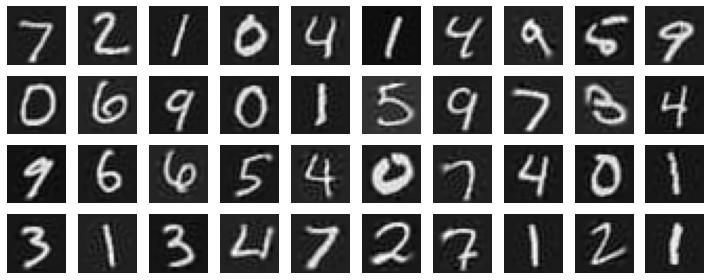

In [25]:
# Show a few examples
plt.figure(figsize=(10, 4))
for ind in range(40):
    plt.subplot(4, 10, ind+1)
    plt.imshow(x_train_hat[ind].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Challenge: verifica si hay diferencias en el desempeño de algún clasificador usando los espacios X y Z como variables explicativas

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [16]:
# Grid search over SVC using X space
hyperparams = {'kernel': ['poly', 'rbf'],
               'C': [0.1, 1.0, 10, 100, 1000],
               'degree': [1, 2, 3, 4, 5, 6],
               'coef0': [0, 1/2, 1, 2]}

gs_model = GridSearchCV(SVC(), hyperparams, n_jobs=-1, verbose=10)
gs_model.fit(x_train, y_train)

print(f"Best score: {gs_model.best_score_:.3f}")
print(f"Best params: {gs_model.best_params_}")

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV 1/5; 3/240] START C=0.1, coef0=0, degree=2, kernel=poly.....................
[CV 1/5; 3/240] END C=0.1, coef0=0, degree=2, kernel=poly;, score=0.913 total time= 2.5min
[CV 3/5; 3/240] START C=0.1, coef0=0, degree=2, kernel=poly.....................
[CV 3/5; 3/240] END C=0.1, coef0=0, degree=2, kernel=poly;, score=0.907 total time= 1.8min
[CV 5/5; 5/240] START C=0.1, coef0=0, degree=3, kernel=poly.....................
[CV 5/5; 5/240] END C=0.1, coef0=0, degree=3, kernel=poly;, score=0.872 total time= 2.2min
[CV 2/5; 8/240] START C=0.1, coef0=0, degree=4, kernel=rbf......................
[CV 2/5; 8/240] END C=0.1, coef0=0, degree=4, kernel=rbf;, score=0.928 total time= 2.5min
[CV 4/5; 10/240] START C=0.1, coef0=0, degree=5, kernel=rbf.....................
[CV 4/5; 10/240] END C=0.1, coef0=0, degree=5, kernel=rbf;, score=0.909 total time= 2.7min
[CV 1/5; 13/240] START C=0.1, coef0=0.5, degree=1, kernel=poly...............

[CV 1/5; 1/240] START C=0.1, coef0=0, degree=1, kernel=poly.....................
[CV 1/5; 1/240] END C=0.1, coef0=0, degree=1, kernel=poly;, score=0.904 total time= 2.6min
[CV 5/5; 3/240] START C=0.1, coef0=0, degree=2, kernel=poly.....................
[CV 5/5; 3/240] END C=0.1, coef0=0, degree=2, kernel=poly;, score=0.903 total time= 2.0min
[CV 2/5; 6/240] START C=0.1, coef0=0, degree=3, kernel=rbf......................
[CV 2/5; 6/240] END C=0.1, coef0=0, degree=3, kernel=rbf;, score=0.928 total time= 2.4min
[CV 4/5; 8/240] START C=0.1, coef0=0, degree=4, kernel=rbf......................
[CV 4/5; 8/240] END C=0.1, coef0=0, degree=4, kernel=rbf;, score=0.909 total time= 2.3min
[CV 5/5; 10/240] START C=0.1, coef0=0, degree=5, kernel=rbf.....................
[CV 5/5; 10/240] END C=0.1, coef0=0, degree=5, kernel=rbf;, score=0.915 total time= 2.6min
[CV 2/5; 13/240] START C=0.1, coef0=0.5, degree=1, kernel=poly..................
[CV 2/5; 13/240] END C=0.1, coef0=0.5, degree=1, kernel=poly;

[CV 4/5; 2/240] START C=0.1, coef0=0, degree=1, kernel=rbf......................
[CV 4/5; 2/240] END C=0.1, coef0=0, degree=1, kernel=rbf;, score=0.909 total time= 3.0min
[CV 3/5; 5/240] START C=0.1, coef0=0, degree=3, kernel=poly.....................
[CV 3/5; 5/240] END C=0.1, coef0=0, degree=3, kernel=poly;, score=0.880 total time= 2.1min
[CV 4/5; 6/240] START C=0.1, coef0=0, degree=3, kernel=rbf......................
[CV 4/5; 6/240] END C=0.1, coef0=0, degree=3, kernel=rbf;, score=0.909 total time= 2.4min
[CV 2/5; 9/240] START C=0.1, coef0=0, degree=5, kernel=poly.....................
[CV 2/5; 9/240] END C=0.1, coef0=0, degree=5, kernel=poly;, score=0.762 total time= 2.6min
[CV 4/5; 11/240] START C=0.1, coef0=0, degree=6, kernel=poly....................
[CV 4/5; 11/240] END C=0.1, coef0=0, degree=6, kernel=poly;, score=0.670 total time= 2.6min
[CV 3/5; 14/240] START C=0.1, coef0=0.5, degree=1, kernel=rbf...................
[CV 3/5; 14/240] END C=0.1, coef0=0.5, degree=1, kernel=rbf;

[CV 3/5; 1/240] START C=0.1, coef0=0, degree=1, kernel=poly.....................
[CV 3/5; 1/240] END C=0.1, coef0=0, degree=1, kernel=poly;, score=0.896 total time= 2.6min
[CV 1/5; 4/240] START C=0.1, coef0=0, degree=2, kernel=rbf......................
[CV 1/5; 4/240] END C=0.1, coef0=0, degree=2, kernel=rbf;, score=0.925 total time= 2.4min
[CV 3/5; 6/240] START C=0.1, coef0=0, degree=3, kernel=rbf......................
[CV 3/5; 6/240] END C=0.1, coef0=0, degree=3, kernel=rbf;, score=0.914 total time= 2.3min
[CV 5/5; 8/240] START C=0.1, coef0=0, degree=4, kernel=rbf......................
[CV 5/5; 8/240] END C=0.1, coef0=0, degree=4, kernel=rbf;, score=0.915 total time= 2.4min
[CV 2/5; 11/240] START C=0.1, coef0=0, degree=6, kernel=poly....................
[CV 2/5; 11/240] END C=0.1, coef0=0, degree=6, kernel=poly;, score=0.689 total time= 2.7min
[CV 4/5; 13/240] START C=0.1, coef0=0.5, degree=1, kernel=poly..................
[CV 4/5; 13/240] END C=0.1, coef0=0.5, degree=1, kernel=poly;

[CV 5/5; 1/240] START C=0.1, coef0=0, degree=1, kernel=poly.....................
[CV 5/5; 1/240] END C=0.1, coef0=0, degree=1, kernel=poly;, score=0.897 total time= 2.7min
[CV 2/5; 4/240] START C=0.1, coef0=0, degree=2, kernel=rbf......................
[CV 2/5; 4/240] END C=0.1, coef0=0, degree=2, kernel=rbf;, score=0.928 total time= 2.6min
[CV 3/5; 7/240] START C=0.1, coef0=0, degree=4, kernel=poly.....................
[CV 3/5; 7/240] END C=0.1, coef0=0, degree=4, kernel=poly;, score=0.820 total time= 2.5min
[CV 5/5; 9/240] START C=0.1, coef0=0, degree=5, kernel=poly.....................
[CV 5/5; 9/240] END C=0.1, coef0=0, degree=5, kernel=poly;, score=0.763 total time= 2.5min
[CV 2/5; 12/240] START C=0.1, coef0=0, degree=6, kernel=rbf.....................
[CV 2/5; 12/240] END C=0.1, coef0=0, degree=6, kernel=rbf;, score=0.928 total time= 2.4min
[CV 1/5; 14/240] START C=0.1, coef0=0.5, degree=1, kernel=rbf...................
[CV 1/5; 14/240] END C=0.1, coef0=0.5, degree=1, kernel=rbf;

[CV 1/5; 2/240] START C=0.1, coef0=0, degree=1, kernel=rbf......................
[CV 1/5; 2/240] END C=0.1, coef0=0, degree=1, kernel=rbf;, score=0.925 total time= 2.9min
[CV 5/5; 4/240] START C=0.1, coef0=0, degree=2, kernel=rbf......................
[CV 5/5; 4/240] END C=0.1, coef0=0, degree=2, kernel=rbf;, score=0.915 total time= 2.9min
[CV 1/5; 8/240] START C=0.1, coef0=0, degree=4, kernel=rbf......................
[CV 1/5; 8/240] END C=0.1, coef0=0, degree=4, kernel=rbf;, score=0.925 total time= 2.7min
[CV 3/5; 10/240] START C=0.1, coef0=0, degree=5, kernel=rbf.....................
[CV 3/5; 10/240] END C=0.1, coef0=0, degree=5, kernel=rbf;, score=0.914 total time= 2.2min
[CV 5/5; 12/240] START C=0.1, coef0=0, degree=6, kernel=rbf.....................
[CV 5/5; 12/240] END C=0.1, coef0=0, degree=6, kernel=rbf;, score=0.915 total time= 2.4min
[CV 2/5; 15/240] START C=0.1, coef0=0.5, degree=2, kernel=poly..................
[CV 2/5; 15/240] END C=0.1, coef0=0.5, degree=2, kernel=poly;,

[CV 2/5; 2/240] START C=0.1, coef0=0, degree=1, kernel=rbf......................
[CV 2/5; 2/240] END C=0.1, coef0=0, degree=1, kernel=rbf;, score=0.928 total time= 3.0min
[CV 2/5; 5/240] START C=0.1, coef0=0, degree=3, kernel=poly.....................
[CV 2/5; 5/240] END C=0.1, coef0=0, degree=3, kernel=poly;, score=0.881 total time= 2.4min
[CV 4/5; 7/240] START C=0.1, coef0=0, degree=4, kernel=poly.....................
[CV 4/5; 7/240] END C=0.1, coef0=0, degree=4, kernel=poly;, score=0.822 total time= 2.5min
[CV 1/5; 10/240] START C=0.1, coef0=0, degree=5, kernel=rbf.....................
[CV 1/5; 10/240] END C=0.1, coef0=0, degree=5, kernel=rbf;, score=0.925 total time= 2.5min
[CV 3/5; 12/240] START C=0.1, coef0=0, degree=6, kernel=rbf.....................
[CV 3/5; 12/240] END C=0.1, coef0=0, degree=6, kernel=rbf;, score=0.914 total time= 2.4min
[CV 2/5; 14/240] START C=0.1, coef0=0.5, degree=1, kernel=rbf...................
[CV 2/5; 14/240] END C=0.1, coef0=0.5, degree=1, kernel=rbf;

[CV 4/5; 115/240] START C=10, coef0=0.5, degree=4, kernel=poly..................
[CV 4/5; 115/240] END C=10, coef0=0.5, degree=4, kernel=poly;, score=0.953 total time=  40.4s
[CV 1/5; 117/240] START C=10, coef0=0.5, degree=5, kernel=poly..................
[CV 1/5; 117/240] END C=10, coef0=0.5, degree=5, kernel=poly;, score=0.953 total time=  39.8s
[CV 1/5; 119/240] START C=10, coef0=0.5, degree=6, kernel=poly..................
[CV 1/5; 119/240] END C=10, coef0=0.5, degree=6, kernel=poly;, score=0.949 total time=  52.0s
[CV 3/5; 121/240] START C=10, coef0=1, degree=1, kernel=poly....................
[CV 3/5; 121/240] END C=10, coef0=1, degree=1, kernel=poly;, score=0.923 total time=  32.9s
[CV 3/5; 123/240] START C=10, coef0=1, degree=2, kernel=poly....................
[CV 3/5; 123/240] END C=10, coef0=1, degree=2, kernel=poly;, score=0.949 total time=  38.4s
[CV 5/5; 124/240] START C=10, coef0=1, degree=2, kernel=rbf.....................
[CV 5/5; 124/240] END C=10, coef0=1, degree=2, k

[CV 2/5; 119/240] START C=10, coef0=0.5, degree=6, kernel=poly..................
[CV 2/5; 119/240] END C=10, coef0=0.5, degree=6, kernel=poly;, score=0.959 total time=  45.5s
[CV 1/5; 121/240] START C=10, coef0=1, degree=1, kernel=poly....................
[CV 1/5; 121/240] END C=10, coef0=1, degree=1, kernel=poly;, score=0.923 total time=  31.6s
[CV 5/5; 122/240] START C=10, coef0=1, degree=1, kernel=rbf.....................
[CV 5/5; 122/240] END C=10, coef0=1, degree=1, kernel=rbf;, score=0.966 total time=  56.4s
[CV 5/5; 125/240] START C=10, coef0=1, degree=3, kernel=poly....................
[CV 5/5; 125/240] END C=10, coef0=1, degree=3, kernel=poly;, score=0.960 total time=  39.4s
[CV 5/5; 127/240] START C=10, coef0=1, degree=4, kernel=poly....................
[CV 5/5; 127/240] END C=10, coef0=1, degree=4, kernel=poly;, score=0.961 total time=  45.0s
[CV 5/5; 129/240] START C=10, coef0=1, degree=5, kernel=poly....................
[CV 5/5; 129/240] END C=10, coef0=1, degree=5, kernel

[CV 5/5; 116/240] START C=10, coef0=0.5, degree=4, kernel=rbf...................
[CV 5/5; 116/240] END C=10, coef0=0.5, degree=4, kernel=rbf;, score=0.966 total time= 1.0min
[CV 2/5; 120/240] START C=10, coef0=0.5, degree=6, kernel=rbf...................
[CV 2/5; 120/240] END C=10, coef0=0.5, degree=6, kernel=rbf;, score=0.970 total time= 1.0min
[CV 4/5; 122/240] START C=10, coef0=1, degree=1, kernel=rbf.....................
[CV 4/5; 122/240] END C=10, coef0=1, degree=1, kernel=rbf;, score=0.960 total time= 1.0min
[CV 2/5; 126/240] START C=10, coef0=1, degree=3, kernel=rbf.....................
[CV 2/5; 126/240] END C=10, coef0=1, degree=3, kernel=rbf;, score=0.970 total time= 1.1min
[CV 1/5; 129/240] START C=10, coef0=1, degree=5, kernel=poly....................
[CV 1/5; 129/240] END C=10, coef0=1, degree=5, kernel=poly;, score=0.957 total time=  42.4s
[CV 4/5; 130/240] START C=10, coef0=1, degree=5, kernel=rbf.....................
[CV 4/5; 130/240] END C=10, coef0=1, degree=5, kernel=

[CV 4/5; 120/240] START C=10, coef0=0.5, degree=6, kernel=rbf...................
[CV 4/5; 120/240] END C=10, coef0=0.5, degree=6, kernel=rbf;, score=0.960 total time= 1.0min
[CV 5/5; 123/240] START C=10, coef0=1, degree=2, kernel=poly....................
[CV 5/5; 123/240] END C=10, coef0=1, degree=2, kernel=poly;, score=0.954 total time=  36.5s
[CV 3/5; 125/240] START C=10, coef0=1, degree=3, kernel=poly....................
[CV 3/5; 125/240] END C=10, coef0=1, degree=3, kernel=poly;, score=0.955 total time=  36.6s
[CV 2/5; 127/240] START C=10, coef0=1, degree=4, kernel=poly....................
[CV 2/5; 127/240] END C=10, coef0=1, degree=4, kernel=poly;, score=0.963 total time=  36.8s
[CV 4/5; 128/240] START C=10, coef0=1, degree=4, kernel=rbf.....................
[CV 4/5; 128/240] END C=10, coef0=1, degree=4, kernel=rbf;, score=0.960 total time=  54.6s
[CV 5/5; 131/240] START C=10, coef0=1, degree=6, kernel=poly....................
[CV 5/5; 131/240] END C=10, coef0=1, degree=6, kernel=

[CV 5/5; 110/240] START C=10, coef0=0.5, degree=1, kernel=rbf...................
[CV 5/5; 110/240] END C=10, coef0=0.5, degree=1, kernel=rbf;, score=0.966 total time= 1.1min
[CV 2/5; 114/240] START C=10, coef0=0.5, degree=3, kernel=rbf...................
[CV 2/5; 114/240] END C=10, coef0=0.5, degree=3, kernel=rbf;, score=0.970 total time=  57.3s
[CV 3/5; 116/240] START C=10, coef0=0.5, degree=4, kernel=rbf...................
[CV 3/5; 116/240] END C=10, coef0=0.5, degree=4, kernel=rbf;, score=0.966 total time=  57.3s
[CV 4/5; 118/240] START C=10, coef0=0.5, degree=5, kernel=rbf...................
[CV 4/5; 118/240] END C=10, coef0=0.5, degree=5, kernel=rbf;, score=0.960 total time= 1.0min
[CV 5/5; 121/240] START C=10, coef0=1, degree=1, kernel=poly....................
[CV 5/5; 121/240] END C=10, coef0=1, degree=1, kernel=poly;, score=0.924 total time=  30.3s
[CV 4/5; 123/240] START C=10, coef0=1, degree=2, kernel=poly....................
[CV 4/5; 123/240] END C=10, coef0=1, degree=2, ker

[CV 2/5; 117/240] START C=10, coef0=0.5, degree=5, kernel=poly..................
[CV 2/5; 117/240] END C=10, coef0=0.5, degree=5, kernel=poly;, score=0.963 total time=  46.8s
[CV 1/5; 120/240] START C=10, coef0=0.5, degree=6, kernel=rbf...................
[CV 1/5; 120/240] END C=10, coef0=0.5, degree=6, kernel=rbf;, score=0.963 total time= 1.1min
[CV 3/5; 122/240] START C=10, coef0=1, degree=1, kernel=rbf.....................
[CV 3/5; 122/240] END C=10, coef0=1, degree=1, kernel=rbf;, score=0.966 total time= 1.1min
[CV 1/5; 126/240] START C=10, coef0=1, degree=3, kernel=rbf.....................
[CV 1/5; 126/240] END C=10, coef0=1, degree=3, kernel=rbf;, score=0.963 total time=  58.3s
[CV 3/5; 128/240] START C=10, coef0=1, degree=4, kernel=rbf.....................
[CV 3/5; 128/240] END C=10, coef0=1, degree=4, kernel=rbf;, score=0.966 total time=  55.4s
[CV 1/5; 131/240] START C=10, coef0=1, degree=6, kernel=poly....................
[CV 1/5; 131/240] END C=10, coef0=1, degree=6, kernel=

In [17]:
# Predict and print score
y_train_hat = gs_model.best_estimator_.predict(x_train)

print("true label: ", y_train[:10])
print("prediction: ", y_train_hat[:10])

print(f"MSE on the training set: {gs_model.score(x_train, y_train):.3f}")
print(f"MSE on the validation set: {gs_model.score(x_val, y_val):.3f}")

true label:  [9 5 1 7 7 9 1 2 9 1]
prediction:  [9 5 1 7 7 9 1 2 9 1]
MSE on the training set: 1.000
MSE on the validation set: 0.972
[CV 4/5; 228/240] START C=1000, coef0=1, degree=6, kernel=rbf...................
[CV 4/5; 228/240] END C=1000, coef0=1, degree=6, kernel=rbf;, score=0.960 total time= 1.0min
[CV 1/5; 232/240] START C=1000, coef0=2, degree=2, kernel=rbf...................
[CV 1/5; 232/240] END C=1000, coef0=2, degree=2, kernel=rbf;, score=0.963 total time=  58.5s
[CV 5/5; 234/240] START C=1000, coef0=2, degree=3, kernel=rbf...................
[CV 5/5; 234/240] END C=1000, coef0=2, degree=3, kernel=rbf;, score=0.966 total time= 1.1min
[CV 2/5; 238/240] START C=1000, coef0=2, degree=5, kernel=rbf...................
[CV 2/5; 238/240] END C=1000, coef0=2, degree=5, kernel=rbf;, score=0.970 total time= 1.1min
[CV 5/5; 231/240] START C=1000, coef0=2, degree=2, kernel=poly..................
[CV 5/5; 231/240] END C=1000, coef0=2, degree=2, kernel=poly;, score=0.949 total time=  3

[CV 5/5; 224/240] START C=1000, coef0=1, degree=4, kernel=rbf...................
[CV 5/5; 224/240] END C=1000, coef0=1, degree=4, kernel=rbf;, score=0.966 total time= 1.1min
[CV 2/5; 228/240] START C=1000, coef0=1, degree=6, kernel=rbf...................
[CV 2/5; 228/240] END C=1000, coef0=1, degree=6, kernel=rbf;, score=0.970 total time= 1.1min
[CV 4/5; 231/240] START C=1000, coef0=2, degree=2, kernel=poly..................
[CV 4/5; 231/240] END C=1000, coef0=2, degree=2, kernel=poly;, score=0.944 total time=  35.0s
[CV 2/5; 233/240] START C=1000, coef0=2, degree=3, kernel=poly..................
[CV 2/5; 233/240] END C=1000, coef0=2, degree=3, kernel=poly;, score=0.958 total time=  33.8s
[CV 4/5; 234/240] START C=1000, coef0=2, degree=3, kernel=rbf...................
[CV 4/5; 234/240] END C=1000, coef0=2, degree=3, kernel=rbf;, score=0.960 total time= 1.0min
[CV 1/5; 238/240] START C=1000, coef0=2, degree=5, kernel=rbf...................
[CV 1/5; 238/240] END C=1000, coef0=2, degree=5

In [18]:
# Grid search over SVC using Z space
hyperparams = {'kernel': ['poly', 'rbf'],
               'C': [0.1, 1.0, 10, 100, 1000],
               'degree': [1, 2, 3, 4, 5, 6],
               'coef0': [0, 1/2, 1, 2]}

gs_model = GridSearchCV(SVC(), hyperparams, n_jobs=-1, verbose=10)
gs_model.fit(z_train, y_train)

print(f"Best score: {gs_model.best_score_:.3f}")
print(f"Best params: {gs_model.best_params_}")

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV 5/5; 1/240] START C=0.1, coef0=0, degree=1, kernel=poly.....................
[CV 5/5; 1/240] END C=0.1, coef0=0, degree=1, kernel=poly;, score=0.902 total time=   7.4s
[CV 4/5; 3/240] START C=0.1, coef0=0, degree=2, kernel=poly.....................
[CV 4/5; 3/240] END C=0.1, coef0=0, degree=2, kernel=poly;, score=0.918 total time=  11.0s
[CV 2/5; 6/240] START C=0.1, coef0=0, degree=3, kernel=rbf......................
[CV 2/5; 6/240] END C=0.1, coef0=0, degree=3, kernel=rbf;, score=0.935 total time=  15.2s
[CV 4/5; 8/240] START C=0.1, coef0=0, degree=4, kernel=rbf......................
[CV 4/5; 8/240] END C=0.1, coef0=0, degree=4, kernel=rbf;, score=0.918 total time=  15.2s
[CV 2/5; 10/240] START C=0.1, coef0=0, degree=5, kernel=rbf.....................
[CV 2/5; 10/240] END C=0.1, coef0=0, degree=5, kernel=rbf;, score=0.935 total time=  14.8s
[CV 1/5; 12/240] START C=0.1, coef0=0, degree=6, kernel=rbf...................

[CV 2/5; 2/240] START C=0.1, coef0=0, degree=1, kernel=rbf......................
[CV 2/5; 2/240] END C=0.1, coef0=0, degree=1, kernel=rbf;, score=0.935 total time=  12.2s
[CV 5/5; 4/240] START C=0.1, coef0=0, degree=2, kernel=rbf......................
[CV 5/5; 4/240] END C=0.1, coef0=0, degree=2, kernel=rbf;, score=0.924 total time=  13.8s
[CV 1/5; 7/240] START C=0.1, coef0=0, degree=4, kernel=poly.....................
[CV 1/5; 7/240] END C=0.1, coef0=0, degree=4, kernel=poly;, score=0.737 total time=  19.4s
[CV 3/5; 9/240] START C=0.1, coef0=0, degree=5, kernel=poly.....................
[CV 3/5; 9/240] END C=0.1, coef0=0, degree=5, kernel=poly;, score=0.568 total time=  20.9s
[CV 1/5; 13/240] START C=0.1, coef0=0.5, degree=1, kernel=poly..................
[CV 1/5; 13/240] END C=0.1, coef0=0.5, degree=1, kernel=poly;, score=0.907 total time=   6.2s
[CV 3/5; 13/240] START C=0.1, coef0=0.5, degree=1, kernel=poly..................
[CV 3/5; 13/240] END C=0.1, coef0=0.5, degree=1, kernel=po

[CV 2/5; 3/240] START C=0.1, coef0=0, degree=2, kernel=poly.....................
[CV 2/5; 3/240] END C=0.1, coef0=0, degree=2, kernel=poly;, score=0.936 total time=   9.6s
[CV 3/5; 4/240] START C=0.1, coef0=0, degree=2, kernel=rbf......................
[CV 3/5; 4/240] END C=0.1, coef0=0, degree=2, kernel=rbf;, score=0.927 total time=  12.0s
[CV 5/5; 6/240] START C=0.1, coef0=0, degree=3, kernel=rbf......................
[CV 5/5; 6/240] END C=0.1, coef0=0, degree=3, kernel=rbf;, score=0.924 total time=  13.7s
[CV 1/5; 9/240] START C=0.1, coef0=0, degree=5, kernel=poly.....................
[CV 1/5; 9/240] END C=0.1, coef0=0, degree=5, kernel=poly;, score=0.608 total time=  17.7s
[CV 3/5; 11/240] START C=0.1, coef0=0, degree=6, kernel=poly....................
[CV 3/5; 11/240] END C=0.1, coef0=0, degree=6, kernel=poly;, score=0.430 total time=  22.4s
[CV 2/5; 14/240] START C=0.1, coef0=0.5, degree=1, kernel=rbf...................
[CV 2/5; 14/240] END C=0.1, coef0=0.5, degree=1, kernel=rbf;

[CV 3/5; 2/240] START C=0.1, coef0=0, degree=1, kernel=rbf......................
[CV 3/5; 2/240] END C=0.1, coef0=0, degree=1, kernel=rbf;, score=0.927 total time=  12.6s
[CV 1/5; 5/240] START C=0.1, coef0=0, degree=3, kernel=poly.....................
[CV 1/5; 5/240] END C=0.1, coef0=0, degree=3, kernel=poly;, score=0.907 total time=  13.6s
[CV 2/5; 7/240] START C=0.1, coef0=0, degree=4, kernel=poly.....................
[CV 2/5; 7/240] END C=0.1, coef0=0, degree=4, kernel=poly;, score=0.751 total time=  20.9s
[CV 5/5; 9/240] START C=0.1, coef0=0, degree=5, kernel=poly.....................
[CV 5/5; 9/240] END C=0.1, coef0=0, degree=5, kernel=poly;, score=0.600 total time=  23.1s
[CV 2/5; 13/240] START C=0.1, coef0=0.5, degree=1, kernel=poly..................
[CV 2/5; 13/240] END C=0.1, coef0=0.5, degree=1, kernel=poly;, score=0.915 total time=   9.0s
[CV 1/5; 15/240] START C=0.1, coef0=0.5, degree=2, kernel=poly..................
[CV 1/5; 15/240] END C=0.1, coef0=0.5, degree=2, kernel=p

[CV 1/5; 1/240] START C=0.1, coef0=0, degree=1, kernel=poly.....................
[CV 1/5; 1/240] END C=0.1, coef0=0, degree=1, kernel=poly;, score=0.907 total time=   7.7s
[CV 1/5; 4/240] START C=0.1, coef0=0, degree=2, kernel=rbf......................
[CV 1/5; 4/240] END C=0.1, coef0=0, degree=2, kernel=rbf;, score=0.933 total time=  14.1s
[CV 4/5; 6/240] START C=0.1, coef0=0, degree=3, kernel=rbf......................
[CV 4/5; 6/240] END C=0.1, coef0=0, degree=3, kernel=rbf;, score=0.918 total time=  14.5s
[CV 2/5; 9/240] START C=0.1, coef0=0, degree=5, kernel=poly.....................
[CV 2/5; 9/240] END C=0.1, coef0=0, degree=5, kernel=poly;, score=0.605 total time=  18.7s
[CV 4/5; 11/240] START C=0.1, coef0=0, degree=6, kernel=poly....................
[CV 4/5; 11/240] END C=0.1, coef0=0, degree=6, kernel=poly;, score=0.442 total time=  20.3s
[CV 5/5; 13/240] START C=0.1, coef0=0.5, degree=1, kernel=poly..................
[CV 5/5; 13/240] END C=0.1, coef0=0.5, degree=1, kernel=poly

[CV 4/5; 2/240] START C=0.1, coef0=0, degree=1, kernel=rbf......................
[CV 4/5; 2/240] END C=0.1, coef0=0, degree=1, kernel=rbf;, score=0.918 total time=  13.8s
[CV 3/5; 5/240] START C=0.1, coef0=0, degree=3, kernel=poly.....................
[CV 3/5; 5/240] END C=0.1, coef0=0, degree=3, kernel=poly;, score=0.887 total time=  13.8s
[CV 5/5; 7/240] START C=0.1, coef0=0, degree=4, kernel=poly.....................
[CV 5/5; 7/240] END C=0.1, coef0=0, degree=4, kernel=poly;, score=0.740 total time=  23.1s
[CV 2/5; 11/240] START C=0.1, coef0=0, degree=6, kernel=poly....................
[CV 2/5; 11/240] END C=0.1, coef0=0, degree=6, kernel=poly;, score=0.478 total time=  23.2s
[CV 4/5; 13/240] START C=0.1, coef0=0.5, degree=1, kernel=poly..................
[CV 4/5; 13/240] END C=0.1, coef0=0.5, degree=1, kernel=poly;, score=0.901 total time=   8.8s
[CV 1/5; 16/240] START C=0.1, coef0=0.5, degree=2, kernel=rbf...................
[CV 1/5; 16/240] END C=0.1, coef0=0.5, degree=2, kernel=

[CV 4/5; 109/240] START C=10, coef0=0.5, degree=1, kernel=poly..................
[CV 4/5; 109/240] END C=10, coef0=0.5, degree=1, kernel=poly;, score=0.919 total time=   6.1s
[CV 2/5; 111/240] START C=10, coef0=0.5, degree=2, kernel=poly..................
[CV 2/5; 111/240] END C=10, coef0=0.5, degree=2, kernel=poly;, score=0.970 total time=   6.3s
[CV 2/5; 112/240] START C=10, coef0=0.5, degree=2, kernel=rbf...................
[CV 2/5; 112/240] END C=10, coef0=0.5, degree=2, kernel=rbf;, score=0.972 total time=  11.7s
[CV 5/5; 115/240] START C=10, coef0=0.5, degree=4, kernel=poly..................
[CV 5/5; 115/240] END C=10, coef0=0.5, degree=4, kernel=poly;, score=0.969 total time=   9.7s
[CV 1/5; 118/240] START C=10, coef0=0.5, degree=5, kernel=rbf...................
[CV 1/5; 118/240] END C=10, coef0=0.5, degree=5, kernel=rbf;, score=0.966 total time=  10.6s
[CV 2/5; 120/240] START C=10, coef0=0.5, degree=6, kernel=rbf...................
[CV 2/5; 120/240] END C=10, coef0=0.5, degree=

[CV 1/5; 107/240] START C=10, coef0=0, degree=6, kernel=poly....................
[CV 1/5; 107/240] END C=10, coef0=0, degree=6, kernel=poly;, score=0.903 total time=  29.3s
[CV 3/5; 111/240] START C=10, coef0=0.5, degree=2, kernel=poly..................
[CV 3/5; 111/240] END C=10, coef0=0.5, degree=2, kernel=poly;, score=0.961 total time=   5.4s
[CV 5/5; 112/240] START C=10, coef0=0.5, degree=2, kernel=rbf...................
[CV 5/5; 112/240] END C=10, coef0=0.5, degree=2, kernel=rbf;, score=0.969 total time=  10.7s
[CV 4/5; 115/240] START C=10, coef0=0.5, degree=4, kernel=poly..................
[CV 4/5; 115/240] END C=10, coef0=0.5, degree=4, kernel=poly;, score=0.971 total time=   9.9s
[CV 2/5; 118/240] START C=10, coef0=0.5, degree=5, kernel=rbf...................
[CV 2/5; 118/240] END C=10, coef0=0.5, degree=5, kernel=rbf;, score=0.972 total time=  10.8s
[CV 3/5; 120/240] START C=10, coef0=0.5, degree=6, kernel=rbf...................
[CV 3/5; 120/240] END C=10, coef0=0.5, degree=6,

[CV 4/5; 110/240] START C=10, coef0=0.5, degree=1, kernel=rbf...................
[CV 4/5; 110/240] END C=10, coef0=0.5, degree=1, kernel=rbf;, score=0.968 total time=  10.8s
[CV 5/5; 113/240] START C=10, coef0=0.5, degree=3, kernel=poly..................
[CV 5/5; 113/240] END C=10, coef0=0.5, degree=3, kernel=poly;, score=0.969 total time=   7.6s
[CV 1/5; 115/240] START C=10, coef0=0.5, degree=4, kernel=poly..................
[CV 1/5; 115/240] END C=10, coef0=0.5, degree=4, kernel=poly;, score=0.970 total time=  10.2s
[CV 3/5; 117/240] START C=10, coef0=0.5, degree=5, kernel=poly..................
[CV 3/5; 117/240] END C=10, coef0=0.5, degree=5, kernel=poly;, score=0.970 total time=  11.5s
[CV 1/5; 120/240] START C=10, coef0=0.5, degree=6, kernel=rbf...................
[CV 1/5; 120/240] END C=10, coef0=0.5, degree=6, kernel=rbf;, score=0.966 total time=  10.1s
[CV 1/5; 122/240] START C=10, coef0=1, degree=1, kernel=rbf.....................
[CV 1/5; 122/240] END C=10, coef0=1, degree=1,

[CV 4/5; 121/240] START C=10, coef0=1, degree=1, kernel=poly....................
[CV 4/5; 121/240] END C=10, coef0=1, degree=1, kernel=poly;, score=0.919 total time=   4.0s
[CV 4/5; 122/240] START C=10, coef0=1, degree=1, kernel=rbf.....................
[CV 4/5; 122/240] END C=10, coef0=1, degree=1, kernel=rbf;, score=0.968 total time=   9.6s
[CV 5/5; 125/240] START C=10, coef0=1, degree=3, kernel=poly....................
[CV 5/5; 125/240] END C=10, coef0=1, degree=3, kernel=poly;, score=0.965 total time=   5.5s
[CV 5/5; 127/240] START C=10, coef0=1, degree=4, kernel=poly....................
[CV 5/5; 127/240] END C=10, coef0=1, degree=4, kernel=poly;, score=0.968 total time=   6.6s
[CV 5/5; 129/240] START C=10, coef0=1, degree=5, kernel=poly....................
[CV 5/5; 129/240] END C=10, coef0=1, degree=5, kernel=poly;, score=0.968 total time=   7.8s
[CV 5/5; 131/240] START C=10, coef0=1, degree=6, kernel=poly....................
[CV 5/5; 131/240] END C=10, coef0=1, degree=6, kernel=p

[CV 3/5; 121/240] START C=10, coef0=1, degree=1, kernel=poly....................
[CV 3/5; 121/240] END C=10, coef0=1, degree=1, kernel=poly;, score=0.919 total time=   4.2s
[CV 2/5; 122/240] START C=10, coef0=1, degree=1, kernel=rbf.....................
[CV 2/5; 122/240] END C=10, coef0=1, degree=1, kernel=rbf;, score=0.972 total time=   9.5s
[CV 4/5; 125/240] START C=10, coef0=1, degree=3, kernel=poly....................
[CV 4/5; 125/240] END C=10, coef0=1, degree=3, kernel=poly;, score=0.966 total time=   5.2s
[CV 3/5; 127/240] START C=10, coef0=1, degree=4, kernel=poly....................
[CV 3/5; 127/240] END C=10, coef0=1, degree=4, kernel=poly;, score=0.967 total time=   6.5s
[CV 2/5; 129/240] START C=10, coef0=1, degree=5, kernel=poly....................
[CV 2/5; 129/240] END C=10, coef0=1, degree=5, kernel=poly;, score=0.972 total time=   7.7s
[CV 1/5; 131/240] START C=10, coef0=1, degree=6, kernel=poly....................
[CV 1/5; 131/240] END C=10, coef0=1, degree=6, kernel=p

[CV 1/5; 119/240] START C=10, coef0=0.5, degree=6, kernel=poly..................
[CV 1/5; 119/240] END C=10, coef0=0.5, degree=6, kernel=poly;, score=0.970 total time=  14.0s
[CV 5/5; 121/240] START C=10, coef0=1, degree=1, kernel=poly....................
[CV 5/5; 121/240] END C=10, coef0=1, degree=1, kernel=poly;, score=0.923 total time=   4.4s
[CV 1/5; 124/240] START C=10, coef0=1, degree=2, kernel=rbf.....................
[CV 1/5; 124/240] END C=10, coef0=1, degree=2, kernel=rbf;, score=0.966 total time=   9.8s
[CV 4/5; 126/240] START C=10, coef0=1, degree=3, kernel=rbf.....................
[CV 4/5; 126/240] END C=10, coef0=1, degree=3, kernel=rbf;, score=0.968 total time=  10.2s
[CV 2/5; 130/240] START C=10, coef0=1, degree=5, kernel=rbf.....................
[CV 2/5; 130/240] END C=10, coef0=1, degree=5, kernel=rbf;, score=0.972 total time=  10.0s
[CV 4/5; 132/240] START C=10, coef0=1, degree=6, kernel=rbf.....................
[CV 4/5; 132/240] END C=10, coef0=1, degree=6, kernel=r

Best score: 0.971
Best params: {'C': 10, 'coef0': 0.5, 'degree': 4, 'kernel': 'poly'}
[CV 3/5; 238/240] START C=1000, coef0=2, degree=5, kernel=rbf...................
[CV 3/5; 238/240] END C=1000, coef0=2, degree=5, kernel=rbf;, score=0.965 total time=   8.3s
[CV 4/5; 227/240] START C=1000, coef0=1, degree=6, kernel=poly..................
[CV 4/5; 227/240] END C=1000, coef0=1, degree=6, kernel=poly;, score=0.967 total time=   9.1s
[CV 2/5; 230/240] START C=1000, coef0=2, degree=1, kernel=rbf...................
[CV 2/5; 230/240] END C=1000, coef0=2, degree=1, kernel=rbf;, score=0.972 total time=   9.6s
[CV 4/5; 233/240] START C=1000, coef0=2, degree=3, kernel=poly..................
[CV 4/5; 233/240] END C=1000, coef0=2, degree=3, kernel=poly;, score=0.960 total time=   4.9s
[CV 1/5; 235/240] START C=1000, coef0=2, degree=4, kernel=poly..................
[CV 1/5; 235/240] END C=1000, coef0=2, degree=4, kernel=poly;, score=0.963 total time=   5.6s
[CV 3/5; 236/240] START C=1000, coef0=2, 

[CV 4/5; 223/240] START C=1000, coef0=1, degree=4, kernel=poly..................
[CV 4/5; 223/240] END C=1000, coef0=1, degree=4, kernel=poly;, score=0.970 total time=   6.2s
[CV 1/5; 225/240] START C=1000, coef0=1, degree=5, kernel=poly..................
[CV 1/5; 225/240] END C=1000, coef0=1, degree=5, kernel=poly;, score=0.970 total time=   7.5s
[CV 5/5; 226/240] START C=1000, coef0=1, degree=5, kernel=rbf...................
[CV 5/5; 226/240] END C=1000, coef0=1, degree=5, kernel=rbf;, score=0.969 total time=   9.4s
[CV 5/5; 229/240] START C=1000, coef0=2, degree=1, kernel=poly..................
[CV 5/5; 229/240] END C=1000, coef0=2, degree=1, kernel=poly;, score=0.917 total time=   4.4s
[CV 3/5; 231/240] START C=1000, coef0=2, degree=2, kernel=poly..................
[CV 3/5; 231/240] END C=1000, coef0=2, degree=2, kernel=poly;, score=0.946 total time=   4.6s
[CV 1/5; 233/240] START C=1000, coef0=2, degree=3, kernel=poly..................
[CV 1/5; 233/240] END C=1000, coef0=2, degree

In [20]:
# Predict and print score
y_train_hat = gs_model.best_estimator_.predict(z_train)

print("true label: ", y_train[:10])
print("prediction: ", y_train_hat[:10])

z_val = pca_model.transform(x_val)
print(z_val.shape)

print(f"MSE on the training set: {gs_model.score(z_train, y_train):.3f}")
print(f"MSE on the validation set: {gs_model.score(z_val, y_val):.3f}")

true label:  [9 5 1 7 7 9 1 2 9 1]
prediction:  [9 5 1 7 7 9 1 2 9 1]
(3300, 146)
MSE on the training set: 1.000
MSE on the validation set: 0.974
